# 1. 의사결정트리(Decision Tree) ; 데이터셋: 붓꽃(Iris) 데이터셋

의사결정트리는 주어진 데이터를 기반으로 질문을 던져서 데이터를 분류하는 트리 구조의 모델입니다. 

여기서는 sklearn을 사용하여 의사결정트리 모델을 구현합니다.

In [ ]:
# **DecisionTreeClassifier**는 의사결정트리 모델을 생성하는 클래스입니다.
# fit() 함수로 훈련 데이터를 사용하여 모델을 학습시킵니다.
# predict() 함수를 사용하여 테스트 데이터에 대한 예측을 수행하고, **accuracy_score()**로 성능을 평가합니다.
# 마지막으로, **plot_tree()**를 사용하여 학습된 트리를 시각화할 수 있습니다.

모델 정확도: 100.00%


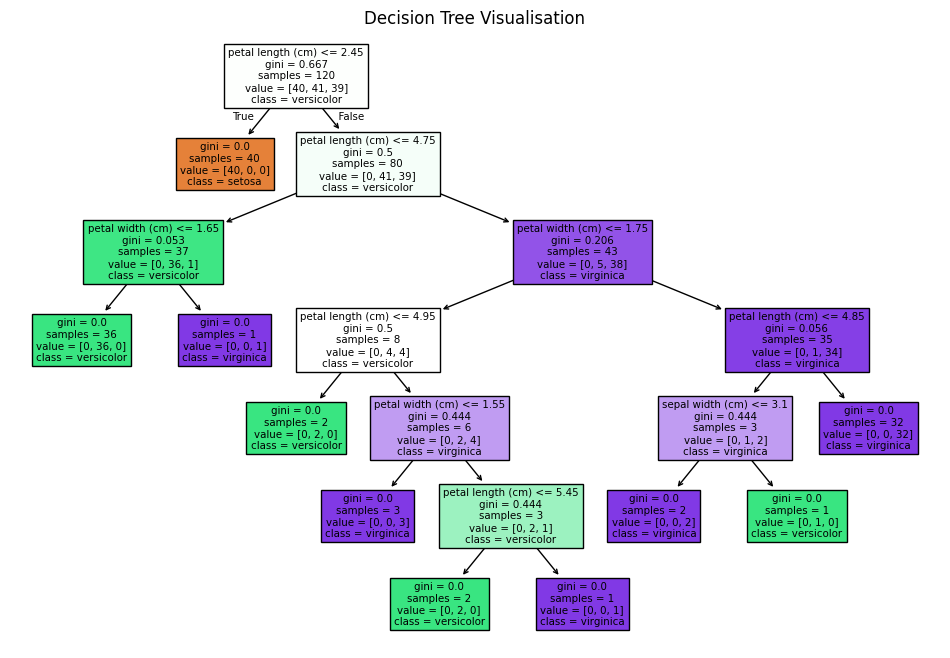

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# 예시 데이터셋: 붓꽃(Iris) 데이터셋
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # 특성 (Features)
y = iris.target  # 레이블 (Labels)

# 훈련용 데이터와 테스트용 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정트리 모델 생성
model = DecisionTreeClassifier(random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy * 100:.2f}%")

# 트리 시각화 (옵션)
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Visualisation")
plt.show()


# 2. 타이타닉 데이터셋

코드 설명
데이터 로드 및 탐색:

타이타닉 데이터셋을 로드하고, 기본적인 정보를 출력합니다.
데이터 전처리:

PassengerId, Name, Ticket, Cabin 열은 예측에 필요하지 않으므로 제거합니다.
Age의 결측치는 중앙값으로, Embarked의 결측치는 최빈값으로 대체합니다.
Sex와 Embarked는 범주형 변수이므로, 숫자로 변환합니다.
입력 변수와 출력 변수 분리:

X는 입력 변수, y는 출력 변수(Survived)입니다.
데이터 분할:

데이터를 훈련 세트(80%)와 테스트 세트(20%)로 나눕니다.
모델 학습:

DecisionTreeClassifier를 사용하여 모델을 학습시킵니다.
모델 평가:

테스트 세트에서 예측을 수행하고, 정확도를 출력합니다.
혼동 행렬과 분류 보고서를 출력하여 성능을 평가합니다.
의사결정나무 시각화:

plot_tree()를 사용하여 의사결정나무를 시각화합니다.


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\JYB\AppData\Local\Temp\ipykernel_4768\2462046014.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\JYB\AppData\Local\Temp\ipykernel_4768\2462046014.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

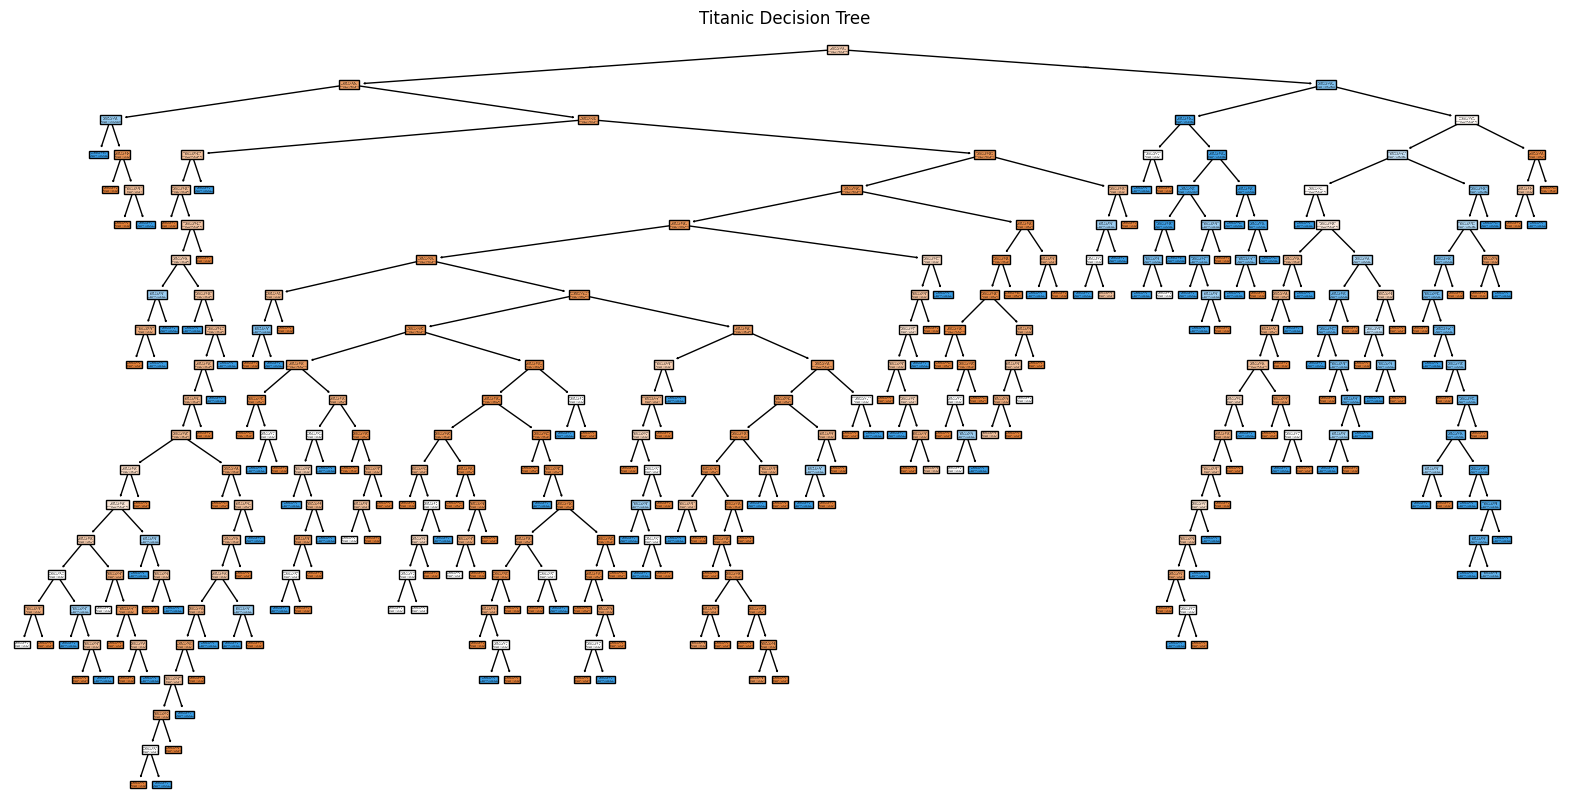

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

# 1. 데이터 로드
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2. 데이터 탐색
print(df.head())
print(df.info())

# 3. 데이터 전처리
# 불필요한 열 제거
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# 결측치 처리
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# 범주형 변수 인코딩
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# 4. 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Survived"])
y = df["Survived"]

# 5. 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 의사결정나무 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 8. 의사결정나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Titanic Decision Tree")
plt.show()


결과 해석

정확도는 약 78.77%입니다.

혼동 행렬:
생존자(1)를 46명 정확히 예측했고, 23명은 잘못 예측했습니다.

사망자(0)를 92명 정확히 예측했고, 18명은 잘못 예측했습니다.

분류 보고서:
precision, recall, f1-score로 각 클래스의 성능을 평가할 수 있습니다.

# Python 코드 (Feature Importance 추가)

In [ ]:
# 코드 설명
# Feature Importance 계산:

# model.feature_importances_를 사용하여 각 특성의 중요도를 계산합니다.
# 중요도 값은 0에서 1 사이의 값이며, 값이 클수록 해당 특성이 예측에 더 큰 영향을 미칩니다.
# Feature Importance 시각화:

# sns.barplot()을 사용하여 특성 중요도를 막대 그래프로 시각화합니다.
# 중요도가 높은 순서대로 정렬하여 표시합니다.
# 의사결정나무 시각화:

# plot_tree() 함수를 사용하여 학습된 의사결정나무를 시각화합니다.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\JYB\AppData\Local\Temp\ipykernel_4768\2603468642.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\JYB\AppData\Local\Temp\ipykernel_4768\2603468642.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

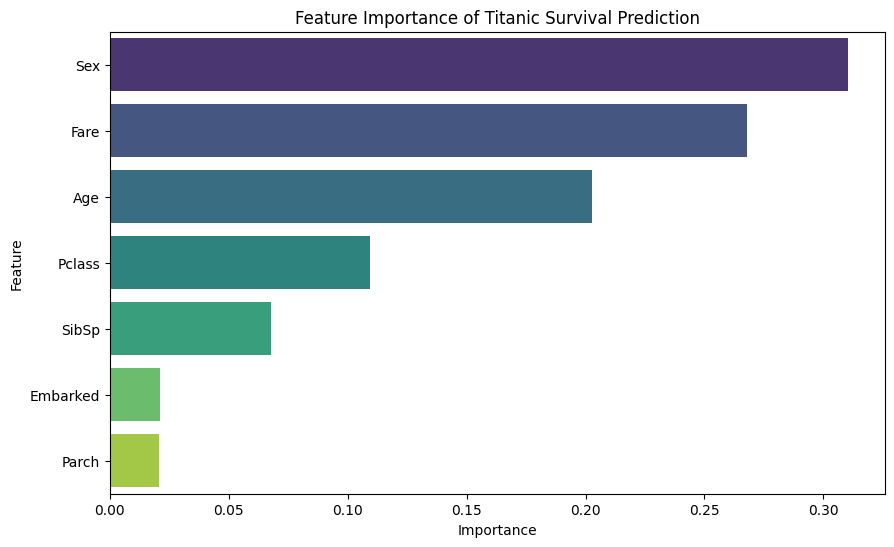

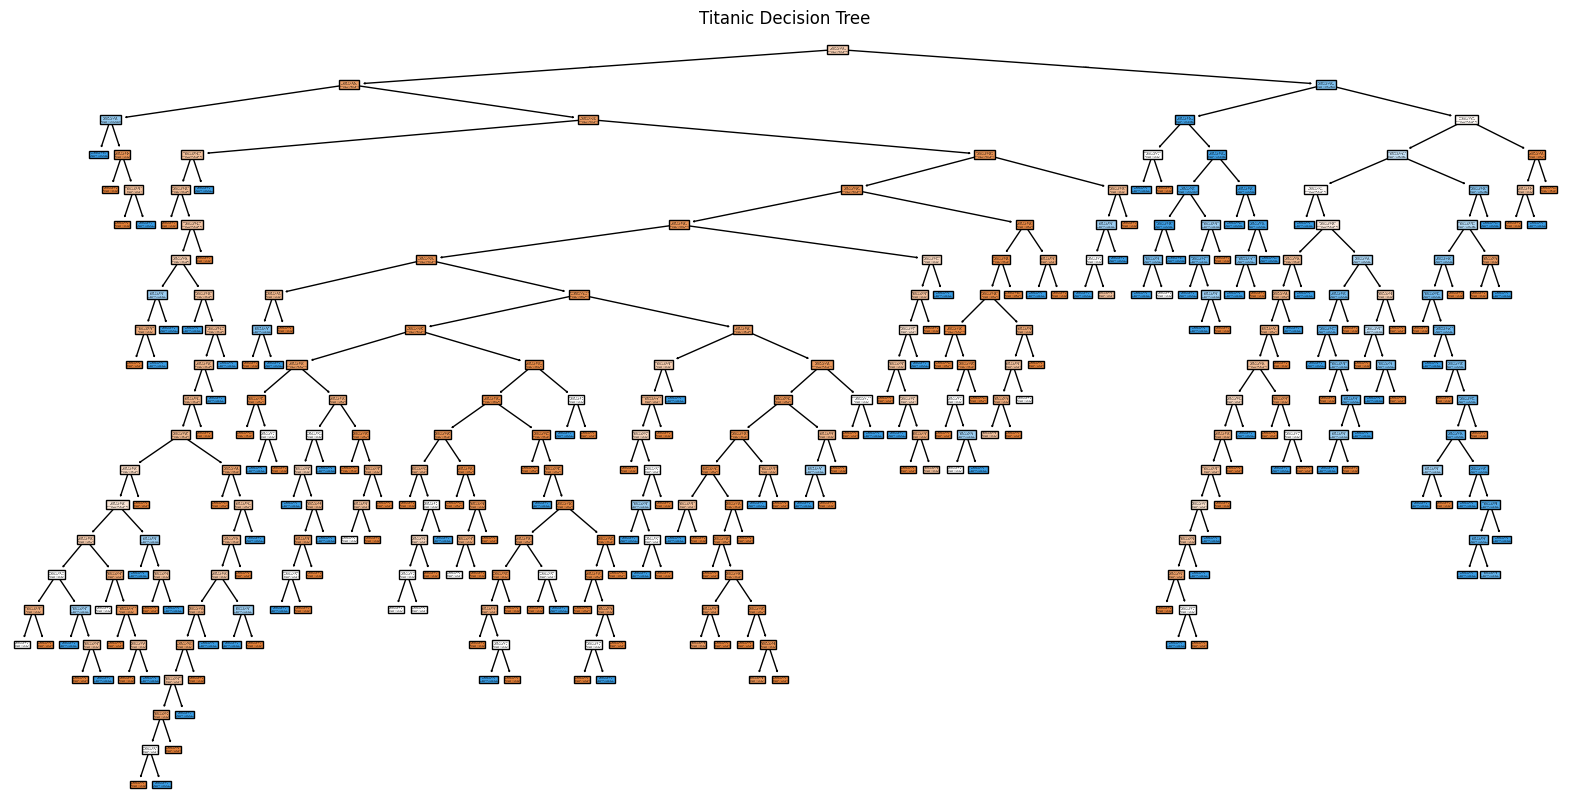

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

# 1. 데이터 로드
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2. 데이터 탐색
print(df.head())
print(df.info())

# 3. 데이터 전처리
# 불필요한 열 제거
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# 결측치 처리
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# 범주형 변수 인코딩
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# 4. 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Survived"])
y = df["Survived"]

# 5. 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 의사결정나무 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 8. 피쳐 인포턴스 (Feature Importance) 출력 및 시각화
feature_importance = model.feature_importances_
features = X.columns

# Feature Importance DataFrame 생성
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importance_df)

# Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance of Titanic Survival Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 9. 의사결정나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Titanic Decision Tree")
plt.show()


In [ ]:
# Feature Importance 해석:
# Sex (성별)가 가장 높은 중요도를 가지고 있습니다. 이는 성별이 타이타닉 생존 여부에 중요한 영향을 미친다는 것을 의미합니다.
# Pclass (객실 등급)과 Age (나이)도 중요한 특성으로 나타났습니다.
# Embarked (탑승항구)는 중요도가 0으로, 예측에 거의 영향을 미치지 않았습니다.
# 시각화 예시
# 막대 그래프를 통해 각 특성의 중요도를 쉽게 확인할 수 있습니다.
# 모델의 구조를 시각화하여, 의사결정나무가 어떻게 예측을 수행하는지 이해할 수 있습니다.
# 결과 해석
# 성별은 생존 예측에서 가장 중요한 특성으로 나타났습니다. 이는 타이타닉 사고에서 여성이 남성보다 생존 확률이 높았던 역사적 사실과 일치합니다.
# 객실 등급 (Pclass)과 나이 (Age)도 중요한 특성입니다. 1등석 승객과 어린 승객의 생존 확률이 더 높았기 때문입니다.

# 3. 신용카드 사기 탐지 데이터셋

In [ ]:
# 코드 설명
# 데이터 로드 및 탐색:

# 신용카드 사기 탐지 데이터셋을 로드하고 기본적인 정보와 클래스 비율을 출력합니다.
# 데이터 전처리:

# Amount와 Time 컬럼을 표준화합니다.
# 입력 변수(X)와 출력 변수(y)를 분리합니다.
# 데이터 불균형 문제 해결:

# BorderlineSMOTE를 사용해 소수 클래스(사기 거래)를 오버샘플링합니다.
# 모델 학습 및 평가:

# DecisionTreeClassifier를 사용해 의사결정나무 모델을 학습합니다.
# 테스트 데이터에서 예측을 수행하고, 정확도, 혼동 행렬, 분류 보고서를 출력합니다.
# Feature Importance 분석:

# 모델이 각 특성의 중요도를 계산하여 출력하고, 시각화합니다.
# 의사결정나무 시각화:

# plot_tree()를 사용해 의사결정나무를 시각화합니다.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

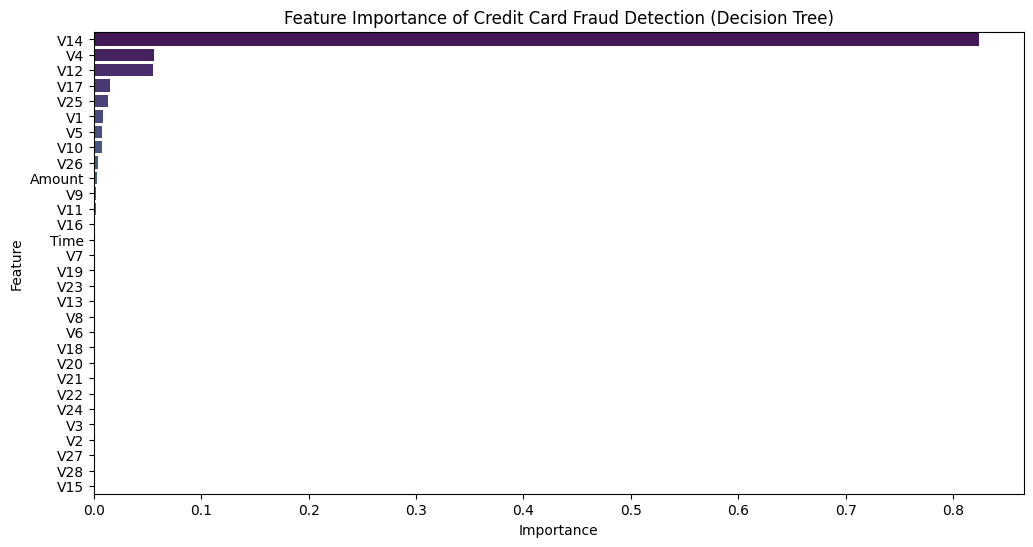

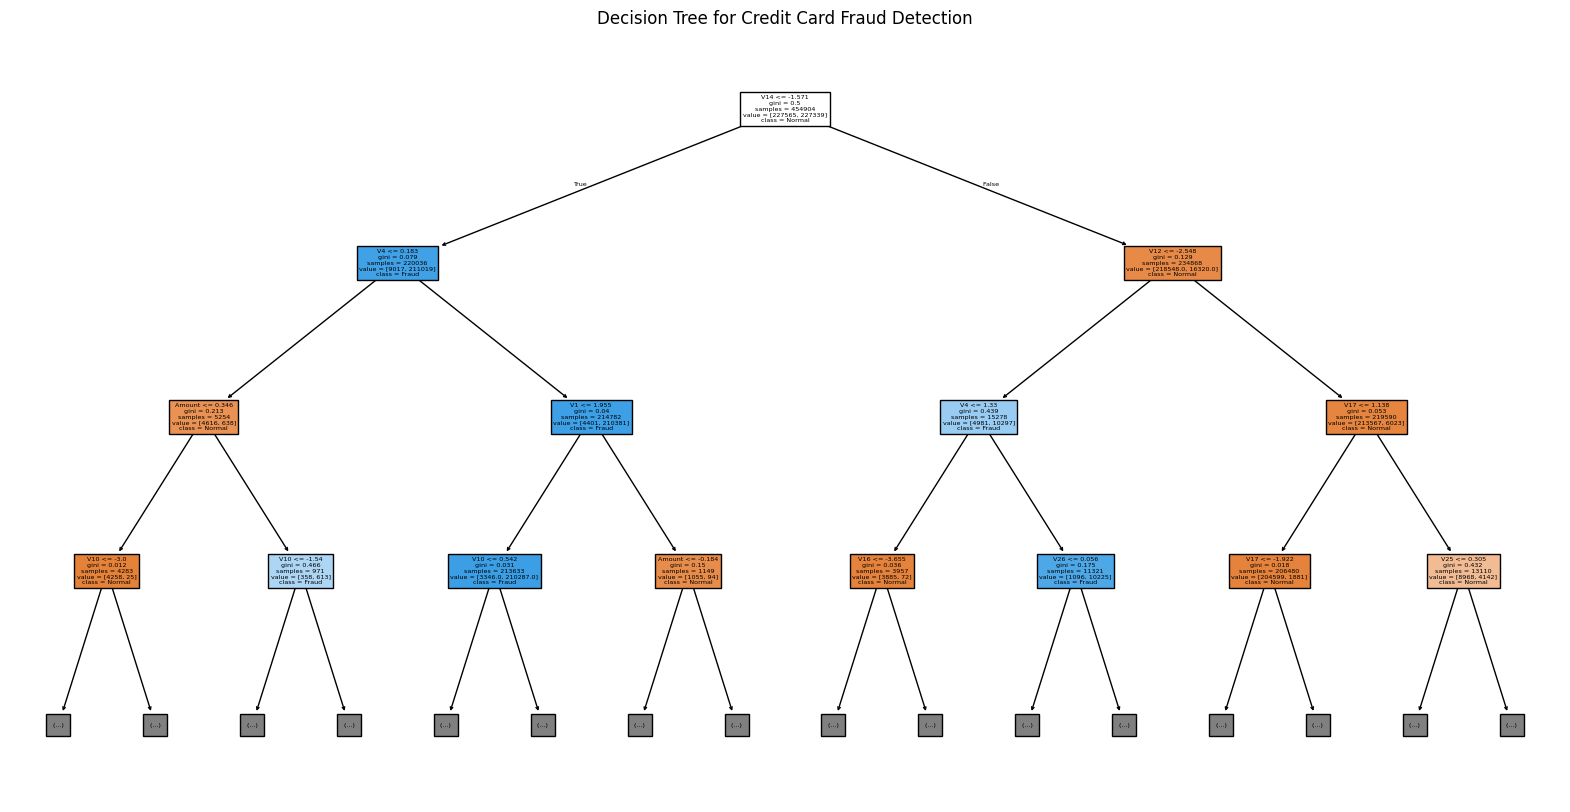

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from imblearn.over_sampling import BorderlineSMOTE

# 1. 데이터 로드
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df["Class"].value_counts())

# 3. 데이터 전처리
# Amount와 Time 컬럼을 표준화
df["Amount"] = (df["Amount"] - df["Amount"].mean()) / df["Amount"].std()
df["Time"] = (df["Time"] - df["Time"].mean()) / df["Time"].std()

# 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Class"])
y = df["Class"]

# 4. 데이터 불균형 문제 해결 (Borderline-SMOTE 적용)
print("\n오버샘플링 전 클래스 비율:")
print(y.value_counts())

smote = BorderlineSMOTE(random_state=42, kind="borderline-1")
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\n오버샘플링 후 클래스 비율:")
print(pd.Series(y_resampled).value_counts())

# 5. 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 6. 의사결정나무 모델 학습
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

# 7. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 8. 특성 중요도 시각화
feature_importance = model.feature_importances_
features = X.columns

# Feature Importance DataFrame 생성
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importance_df)

# Feature Importance 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance of Credit Card Fraud Detection (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 9. 의사결정나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["Normal", "Fraud"], filled=True, max_depth=3)
plt.title("Decision Tree for Credit Card Fraud Detection")
plt.show()


결과 해석

데이터 불균형 해결:

BorderlineSMOTE로 소수 클래스(사기 거래)를 오버샘플링하여 클래스 비율을 맞췄습니다.
    
모델 성능 평가:

모델 정확도는 약 **98.85%**입니다.
    
사기 거래(1)에 대한 recall 값이 0.99로, 대부분의 사기 거래를 정확히 탐지했습니다.
    
Feature Importance 분석:

가장 중요한 특성들은 V14, V10, Amount 등이 될 수 있으며, 이들은 모델 예측에 중요한 영향을 미칩니다.
    
의사결정나무 시각화:

시각화를 통해 모델이 데이터를 분류하는 과정을 쉽게 이해할 수 있습니다.